# Titanic Project by seaborn, matplot, pandas

# Problem Statement
1. Who survived and why , what is the combination of feature to have high probablity to survive on that ship.
2. Who did'nt survived and why , what is the combination of feature to have high probablity to not survive on that ship.

#### PLOT


|Variable|	Definition|	Key|
|---|---|---|
 |survival|	Survival	|0 = No, 1 = Yes|
 |pclass|	Ticket class	|1 = 1st, 2 = 2nd, 3 = 3rd|
 |sex|	Sex	|
 |Age|	Age in years|	
 |sibsp|	# of siblings / spouses aboard the Titanic|	
 |parch|	# of parents / children aboard the Titanic|	
 |ticket|	Ticket number	|
 |fare|	Passenger fare|	
 |cabin|	Cabin number	|
 |embarked	|Port of Embarkation	|C = Cherbourg, Q = Queenstown, S = Southampton|


### Variable Notes
- pclass: A proxy for socio-economic status (SES)
- 1st = Upper
- 2nd = Middle
- 3rd = Lower
- 
- age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
- 
- sibsp: The dataset defines family relations in this way...
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)
- 
- parch: The dataset defines family relations in this way...
- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson
- Some children travelled only with a nanny, therefore parch=0 for them.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [7]:
df.isnull().sum()[df.isnull().sum()>0]

age            177
embarked         2
deck           688
embark_town      2
dtype: int64

In [8]:
#df.at[0,"sex"] #just like loc

In [9]:
#df.iat[0,2]

In [10]:
#df['class'].cat.codes

In [11]:
#df['class'].astype('category').cat.codes

By Gender

In [12]:
df.sex.value_counts()

sex
male      577
female    314
Name: count, dtype: int64

In [13]:
pd.crosstab(df.sex,df.alive)

alive,no,yes
sex,,
female,81,233
male,468,109


In [14]:
#pd.crosstab(df.sex,[df.pclass,df.survived])

In [15]:
df.sex.value_counts(normalize=True)*100

sex
male      64.758698
female    35.241302
Name: proportion, dtype: float64

In [16]:
233/314*100 # 74% female survived

74.20382165605095

In [17]:
109/577*100

18.890814558058924

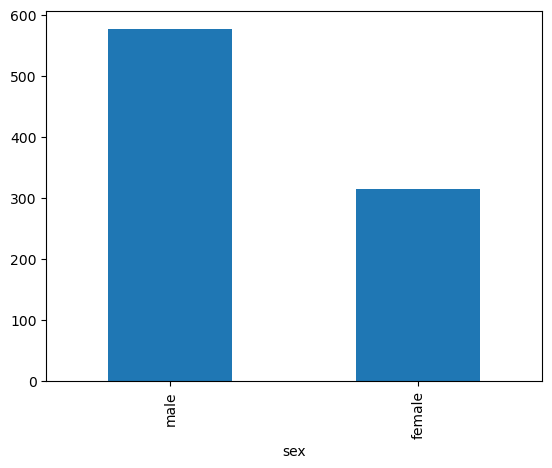

In [3]:
df.sex.value_counts().plot(kind="bar")
plt.show()

In [ ]:
sns.countplot(data=df,
    x="sex",
    )

In [ ]:
sns.countplot(data=df,
              x="sex",
    )
plt.show()

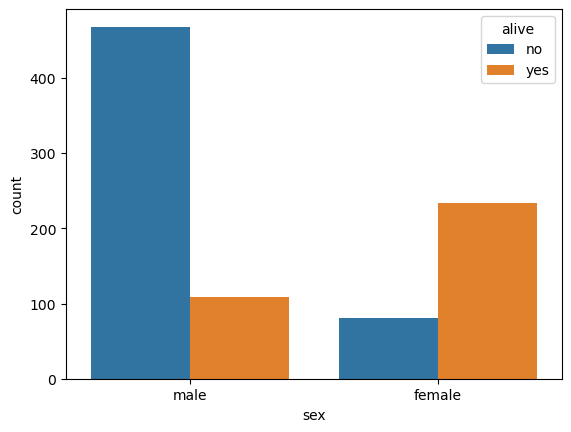

In [4]:
sns.countplot(data=df,
              x="sex",
              hue="alive"
    )
plt.show()

### Man died more than Female

In [ ]:
sns.countplot(data=df,
              x="who",
    )
plt.show()

In [ ]:
sns.countplot(data=df,
              x="who",
              hue="alive"
    )
plt.show()

In [26]:
pd.crosstab(df.who,df.alive)

alive,no,yes
who,,
child,34,49
man,449,88
woman,66,205


### Childrens have died to in equal praportion

In [ ]:
sns.countplot(data=df,
              x="sex",
              hue="who"
    )
plt.show()

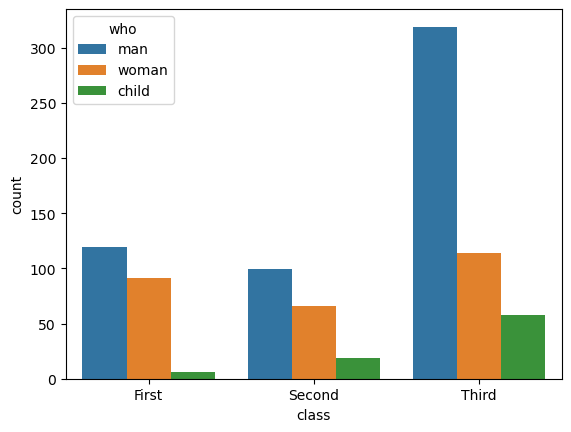

In [27]:
sns.countplot(data=df,
              x="class",
              hue="who"
    )
plt.show()

In [30]:
pd.crosstab(df.who,df["class"])

class,First,Second,Third
who,,,
child,6,19,58
man,119,99,319
woman,91,66,114


In [31]:
df.who.replace({"man":0,"woman":0,"child":1})

C:\Users\Asus\AppData\Local\Temp\ipykernel_34240\336417428.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.who.replace({"man":0,"woman":0,"child":1})


0      0
1      0
2      0
3      0
4      0
      ..
886    0
887    0
888    0
889    0
890    0
Name: who, Length: 891, dtype: int64

In [34]:
pd.crosstab(df.who.replace({"man":0,"woman":0,"child":1}),df["class"])

C:\Users\Asus\AppData\Local\Temp\ipykernel_34240\2035287547.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pd.crosstab(df.who.replace({"man":0,"woman":0,"child":1}),df["class"])


class,First,Second,Third
who,,,
0,210,165,433
1,6,19,58


In [36]:
pd.crosstab(df.who.replace({"man":0,"woman":0,"child":1}),[df["class"],df.alive])

C:\Users\Asus\AppData\Local\Temp\ipykernel_34240\1016270209.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pd.crosstab(df.who.replace({"man":0,"woman":0,"child":1}),[df["class"],df.alive])


class First      Second     Third    
alive    no  yes     no yes    no yes
who                                  
0        79  131     97  68   339  94
1         1    5      0  19    33  25

#### Class in which you are matters a lot to survive
- Even as a child logic remain same
- 1st class is best for adult and 2nd class is best for child survival

By Class

In [37]:
df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [38]:
df.pclass.unique()

array([3, 1, 2], dtype=int64)

In [39]:
#df["pclass"]
#df.who

In [40]:
df["class"].unique()

['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']

In [33]:
df["class"].value_counts()

class
Third     491
First     216
Second    184
Name: count, dtype: int64

In [41]:
df["class"].value_counts(normalize=True)*100

class
Third     55.106622
First     24.242424
Second    20.650954
Name: proportion, dtype: float64

In [42]:
pd.crosstab(df["class"],df.alive)

alive,no,yes
class,,
First,80,136
Second,97,87
Third,372,119


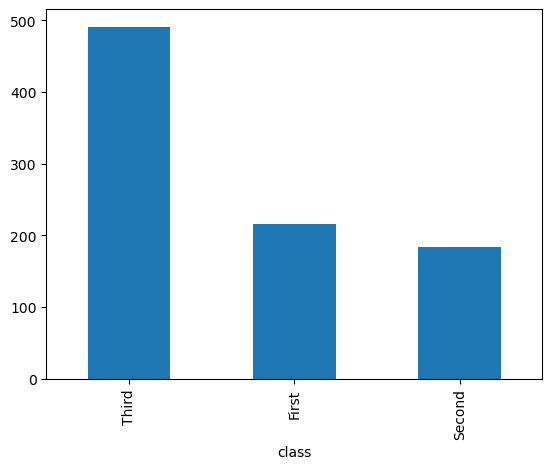

In [43]:
df["class"].value_counts().plot(kind="bar")
plt.show()

<Axes: xlabel='class', ylabel='count'>

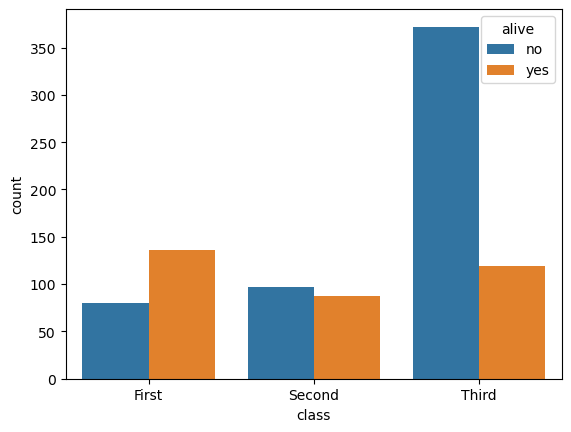

In [44]:
sns.countplot(data=df,
              x="class",
              hue="alive"
    )

In [ ]:
#df["class"].value_counts()

In [ ]:
#df["class"].value_counts(normalize=True)*100

In [45]:
pd.crosstab(df["class"],df.sex)

sex,female,male
class,,
First,94,122
Second,76,108
Third,144,347


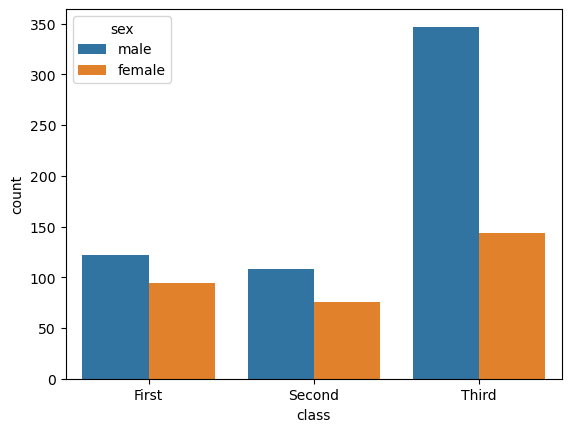

In [46]:
sns.countplot(data=df,
              x="class",
              hue="sex"
    )
plt.show()

By Age and Fare

In [ ]:
df.age.isnull().sum()

<Axes: ylabel='Density'>

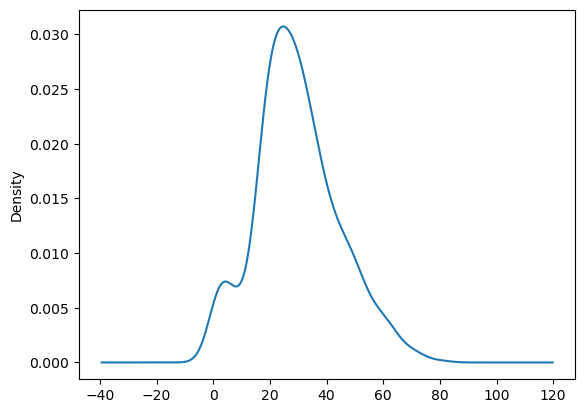

In [47]:
df.age.plot(kind="kde")

<Axes: ylabel='Frequency'>

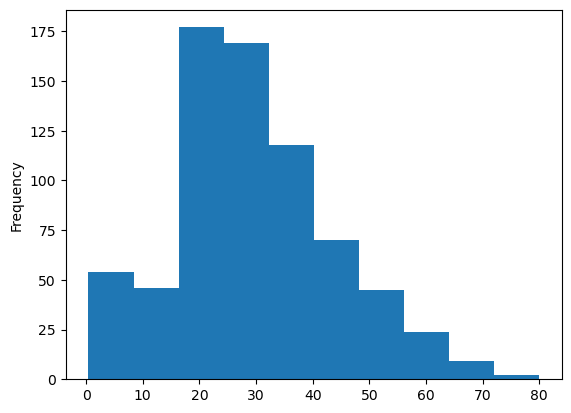

In [48]:
df.age.plot(kind="hist")

<Axes: ylabel='Frequency'>

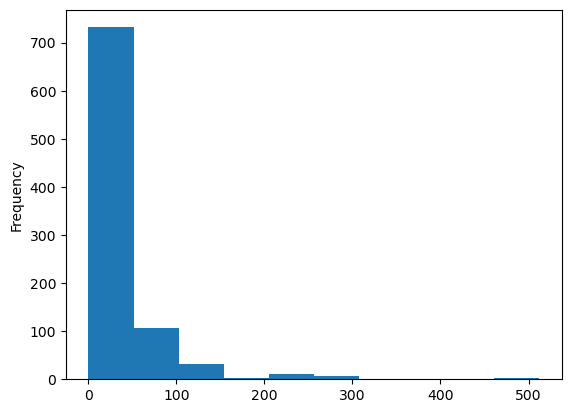

In [49]:
df.fare.plot(kind="hist")

In [50]:
df.fare.mean()

32.204207968574636

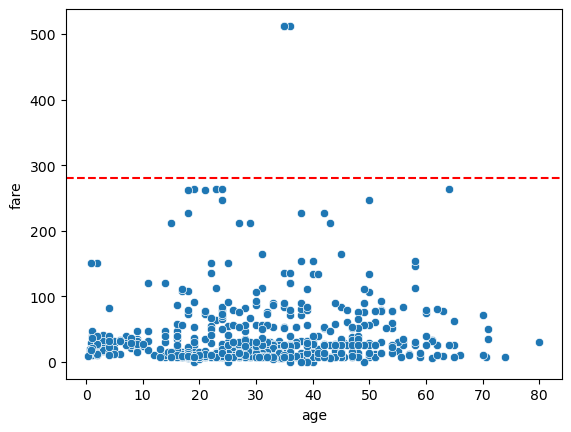

In [51]:
sns.scatterplot(data=df,x="age",y="fare")
plt.axhline(color='r',y=280,linestyle='--')

<Axes: >

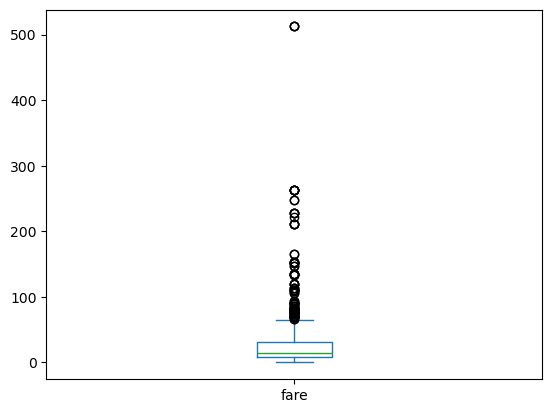

In [52]:
df.fare.plot(kind="box")

<Axes: >

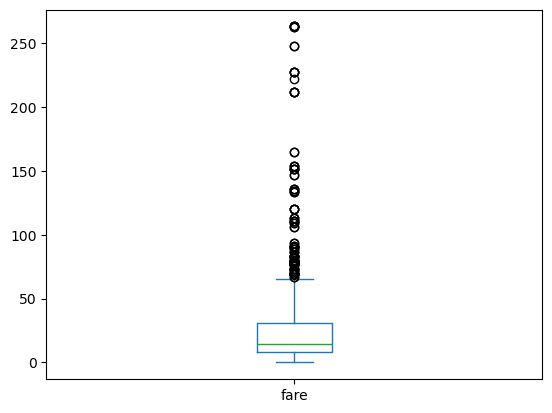

In [53]:
df.fare[df.fare<300].plot(kind="box")

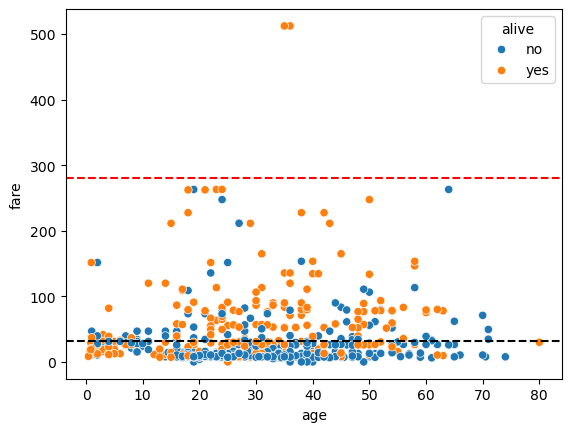

In [54]:
sns.scatterplot(data=df,x="age",y="fare",hue="alive")
plt.axhline(color='r',y=280,linestyle='--')
plt.axhline(color='k',y=df.fare.mean(),linestyle='--')

plt.show()

### Write ur observations!!!
1. Male are surviing less than female
2. First class are survivng more
3. High fare pad are surviving more which lead to there class

In [ ]:
df.head()

In [ ]:
#df.select_dtypes(float)

In [ ]:
df.corr(numeric_only=True) #pip install seaborn --upgrade

In [ ]:
sns.heatmap(df.corr(numeric_only=True))

In [ ]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [ ]:
#! pip install seaborn --upgrade  #then restart kernel

In [ ]:
sns.heatmap(df.corr(numeric_only=True),annot=True,vmin=-1)
plt.show()

In [ ]:
df.head()

In [ ]:
df.deck.unique()

In [ ]:
df.deck.value_counts()

In [ ]:
df.columns

In [ ]:
to_drop=[ 'embark_town',
       'alive',
        'deck'
        ]
# Class is used forcode belo dont drop it

In [ ]:
df.isnull().sum()

In [ ]:
df.isnull().sum()>0

In [ ]:
df.isnull().sum()[df.isnull().sum()>0] # boolean indexing

#### Droping the unwanted columns

In [ ]:
df.drop(columns=to_drop,inplace=True) # run it only once other wise there will be an error

In [ ]:
df.head()

In [ ]:
df.isnull().sum()[df.isnull().sum()>0]

In [ ]:
print(df.age.mean())
df.age.plot(kind="kde")

In [ ]:
df.embarked.mode()[0]

#### Filling The Missing Values

In [46]:
df.age.fillna(df.age.mean(),inplace=True)
df.embarked.fillna(df.embarked.mode()[0],inplace=True)

C:\Users\Ankur Goyal\AppData\Local\Temp\ipykernel_34636\2686037959.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.age.fillna(df.age.mean(),inplace=True)
C:\Users\Ankur Goyal\AppData\Local\Temp\ipykernel_34636\2686037959.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

In [ ]:
df.head()

In [ ]:
df.isnull().sum()

Outliner, encoding, scaling

Outliers

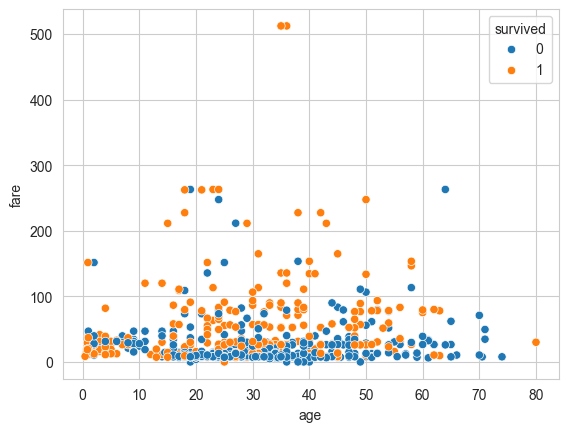

In [5]:
sns.scatterplot(data=df,x="age",y="fare",hue="survived")
plt.show()

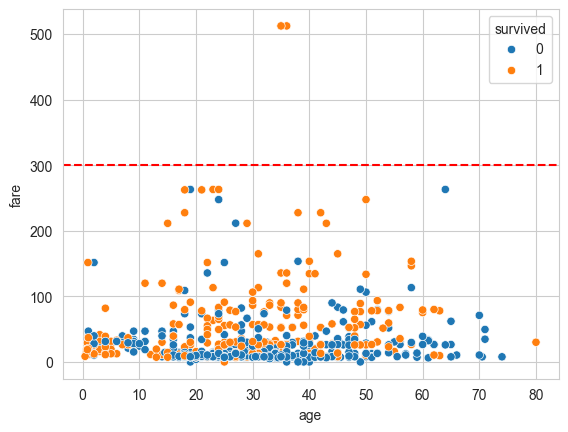

In [6]:
sns.scatterplot(data=df,x="age",y="fare",hue="survived")
plt.axhline(color='r',y=300,linestyle='--')

plt.show()

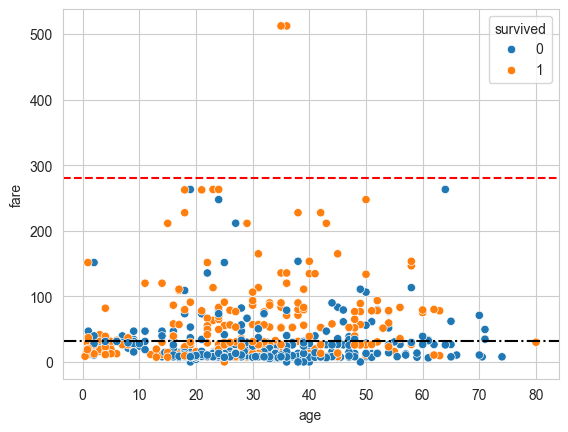

In [7]:
sns.scatterplot(data=df,x="age",y="fare",hue="survived")
plt.axhline(color='r',y=280,linestyle='--')
plt.axhline(color='k',y=df.fare.mean(),linestyle='-.')
plt.show()

In [ ]:
df.fare[df.fare>300]

In [ ]:
df[df.fare>300]

In [ ]:
df.fare[df.fare>250]

In [ ]:
df.fare.mean()

In [ ]:
#df.fare[df.fare>300]=300    # did it below!!!

analysing the values in 1class with there mean!!!

In [ ]:
df["class"].unique()

In [ ]:
df[df["class"]=="First"]

In [ ]:
df.fare[df.fare<300][df["class"]=="First"].mean()

So it does look taking avg is the solution so we will go with top assumed value eg 300

In [ ]:
df.fare[df.fare>300]=300

In [ ]:
df.fare[df.fare>300]

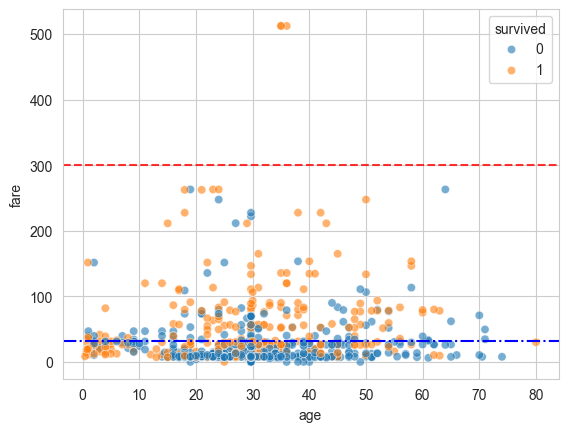

In [48]:
sns.scatterplot(data=df,x="age",y="fare",hue="survived",alpha=.6)
plt.axhline(color='r',y=300,linestyle='--',alpha=.8)  # alpha 0-1  0-transparent
plt.axhline(color='b',y=df.fare.mean(),linestyle='-.')
plt.show()

#### Chart that define more than one thing

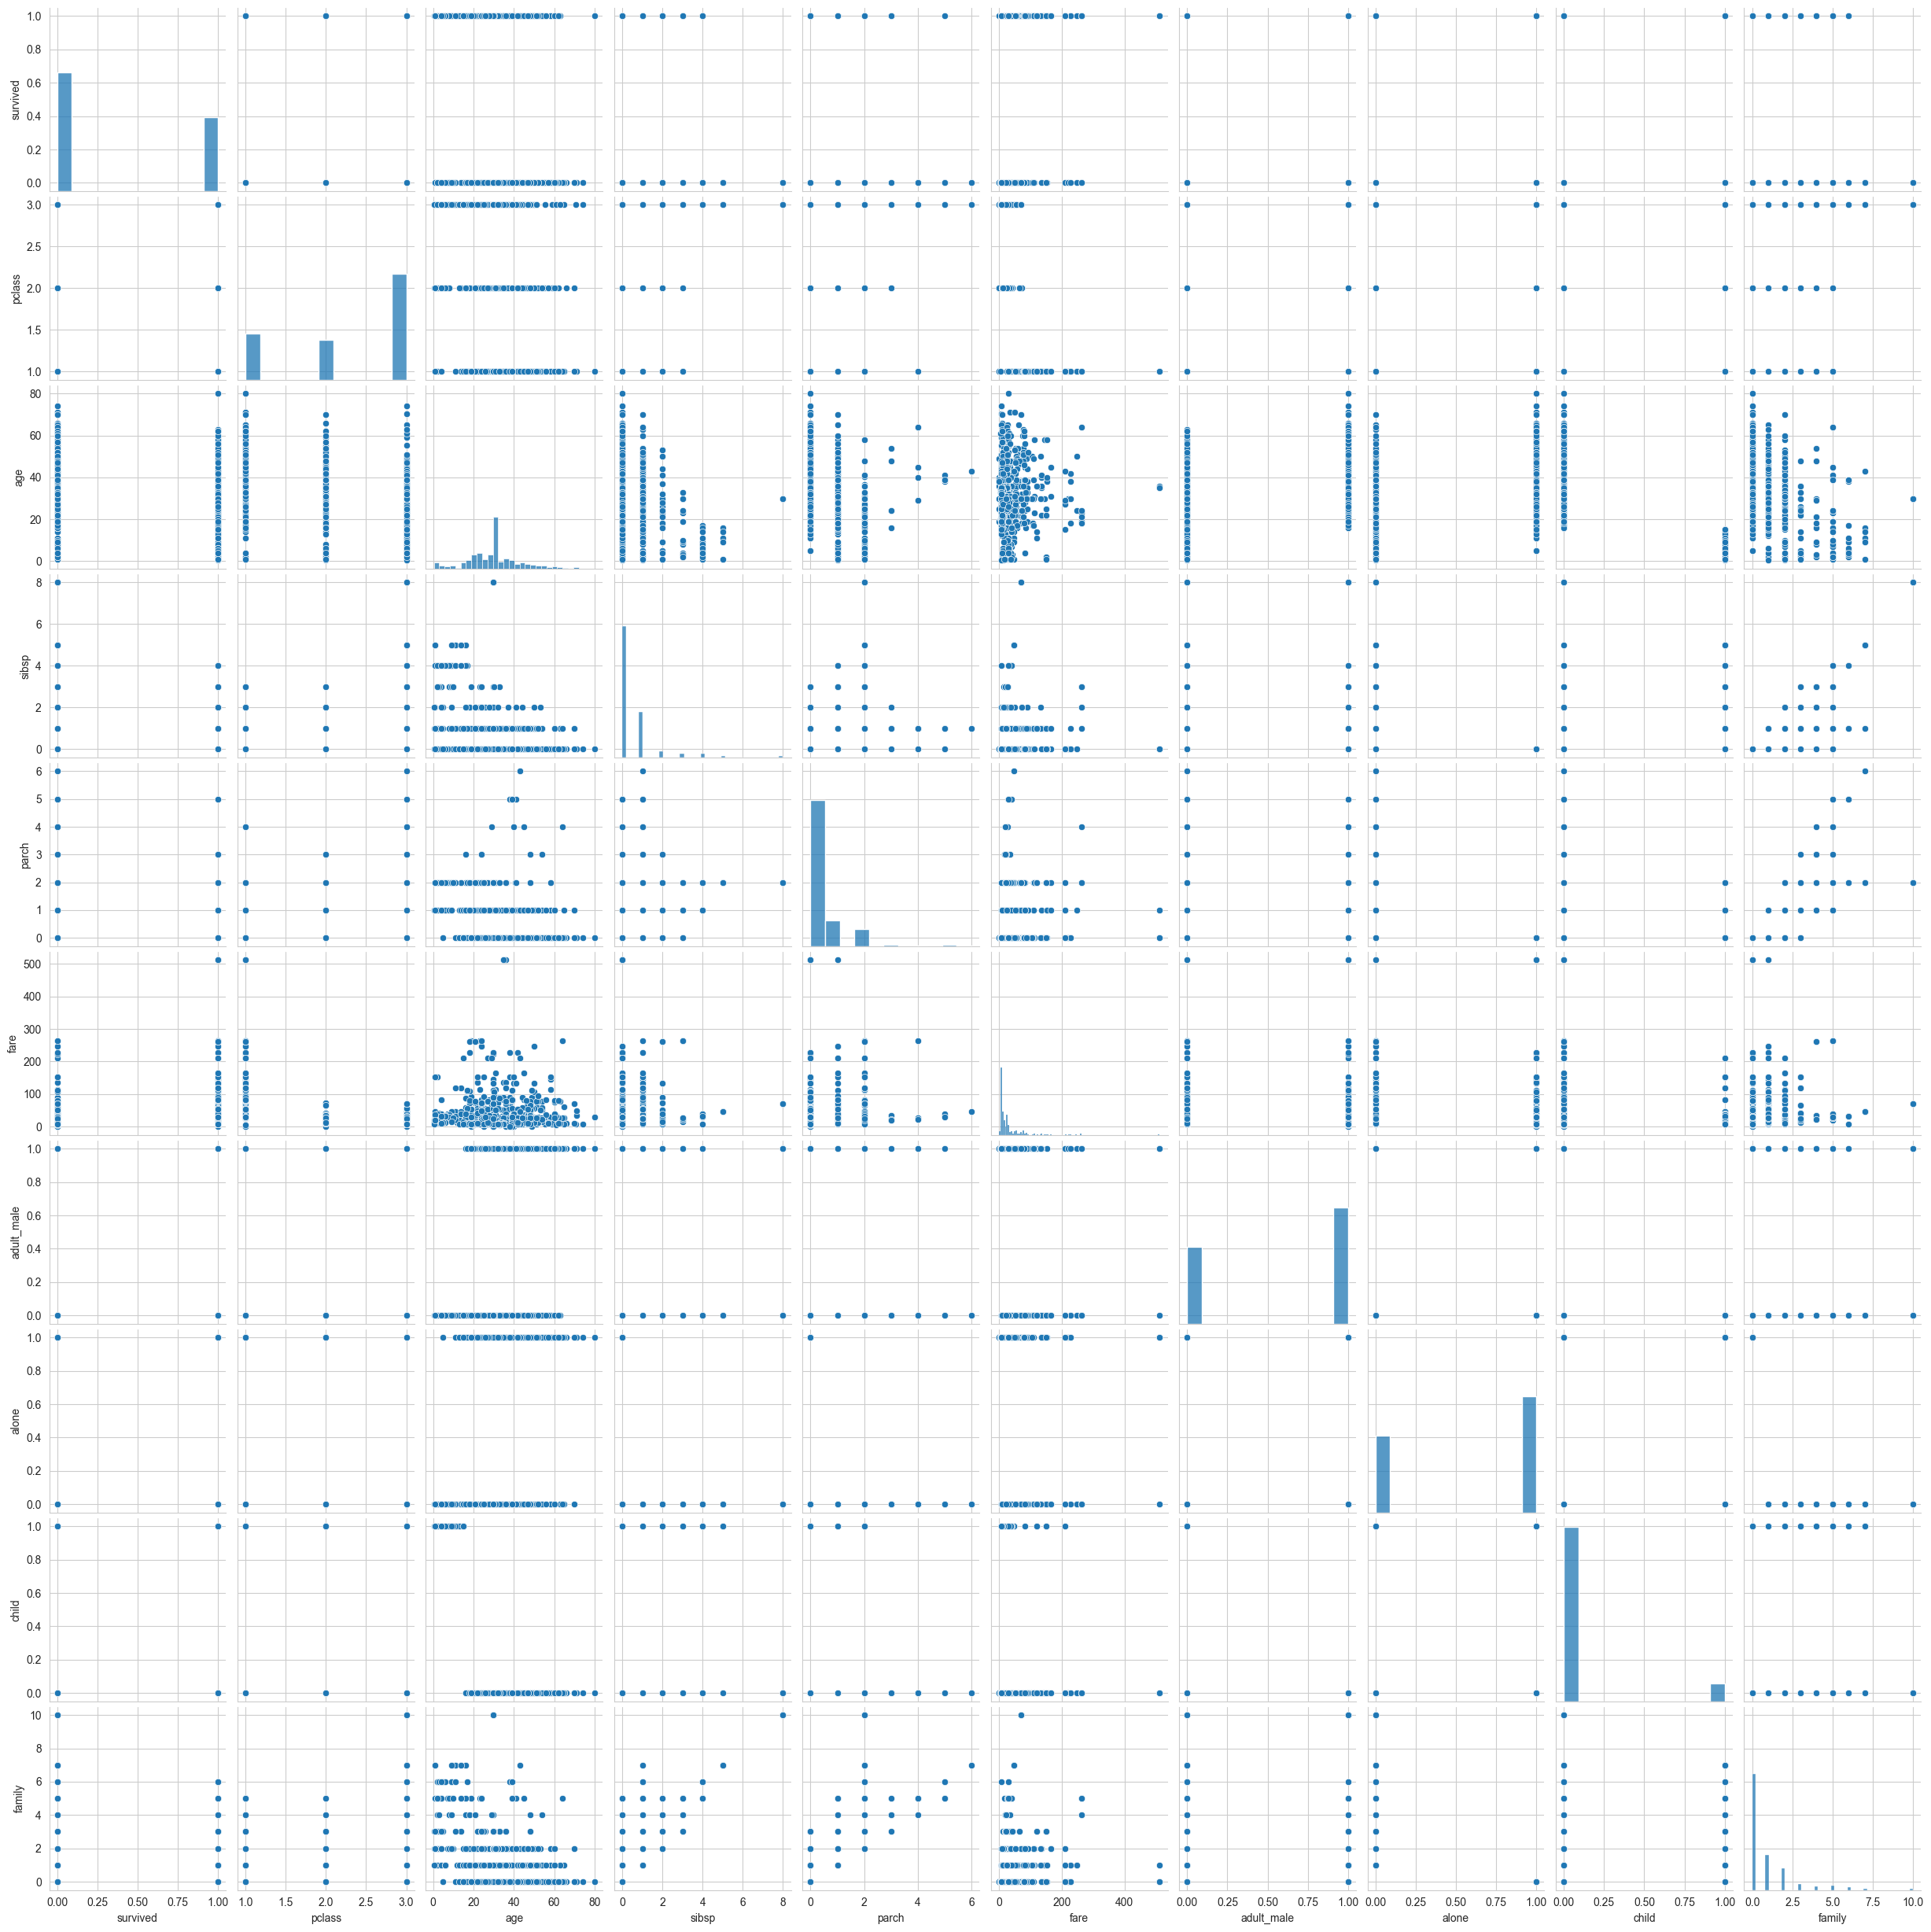

In [49]:
sns.pairplot(df)

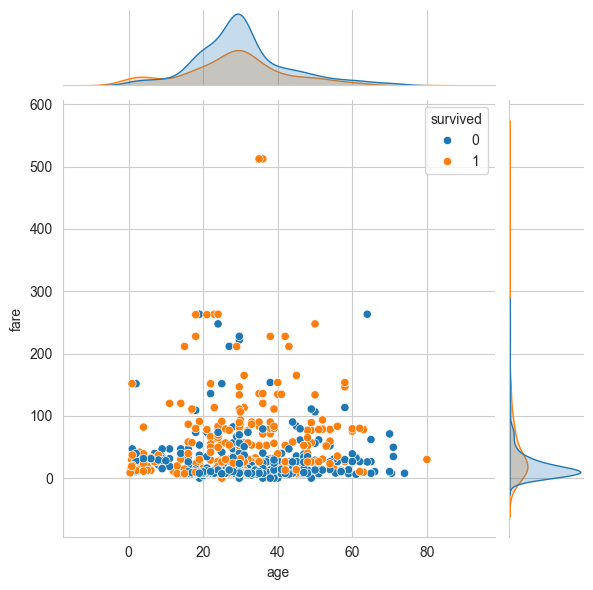

In [50]:
sns.jointplot(data=df,x="age",y="fare",hue="survived")

<Axes: ylabel='fare'>

I:\Learnings\Projects\Python\PyCharm\AIMLProject\.venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 57.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


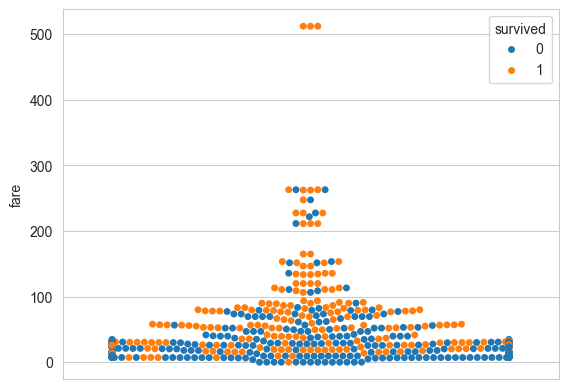

In [51]:
#plt.figure(figsize=(15,10))
sns.swarmplot(data=df,y="fare",hue="survived")#,size=3

<Axes: ylabel='fare'>

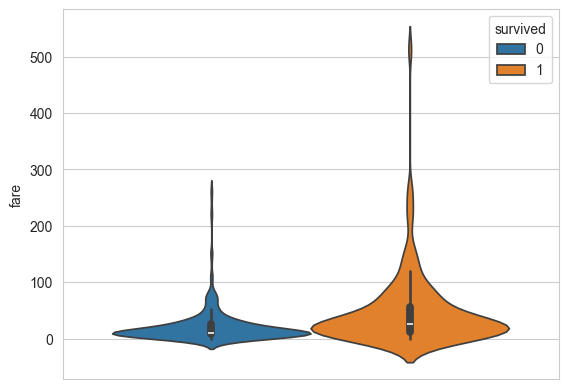

In [55]:
sns.violinplot(data=df,y="fare",hue="survived")

SCALING IN DATA

In [ ]:
df.head()

In [ ]:
df.describe()

<Axes: xlabel='sex', ylabel='count'>

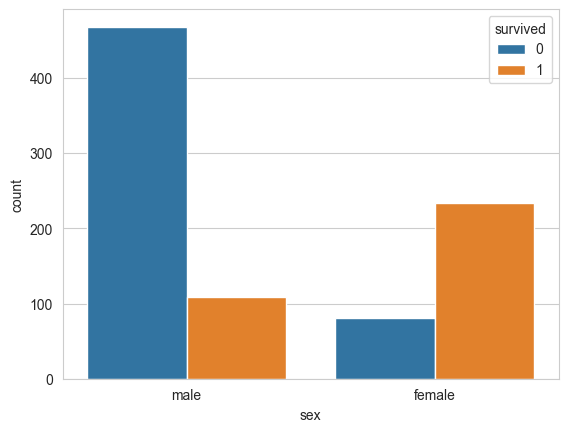

In [59]:
sns.countplot(data=df,x="sex",hue="survived")

## Encoding
`By getdummies`

In [ ]:
df.head()

In [ ]:
df.columns

We have class as ordinal column but its a duplicate
So we plan to drop all duplicates
 
 ['alone','class']

In [24]:
df.drop(columns='class',inplace=True)

KeyError: "['class'] not found in axis"

In [ ]:
df.head(2)

In [ ]:
df.who.unique()

HeatMap

In [25]:
pd.get_dummies(df,drop_first=True).astype(float).head()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone,sex_male,embarked_Q,...,who_woman,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,embark_town_Queenstown,embark_town_Southampton,alive_yes
0,0.0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,0.0,3.0,35.0,0.0,0.0,8.0500,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


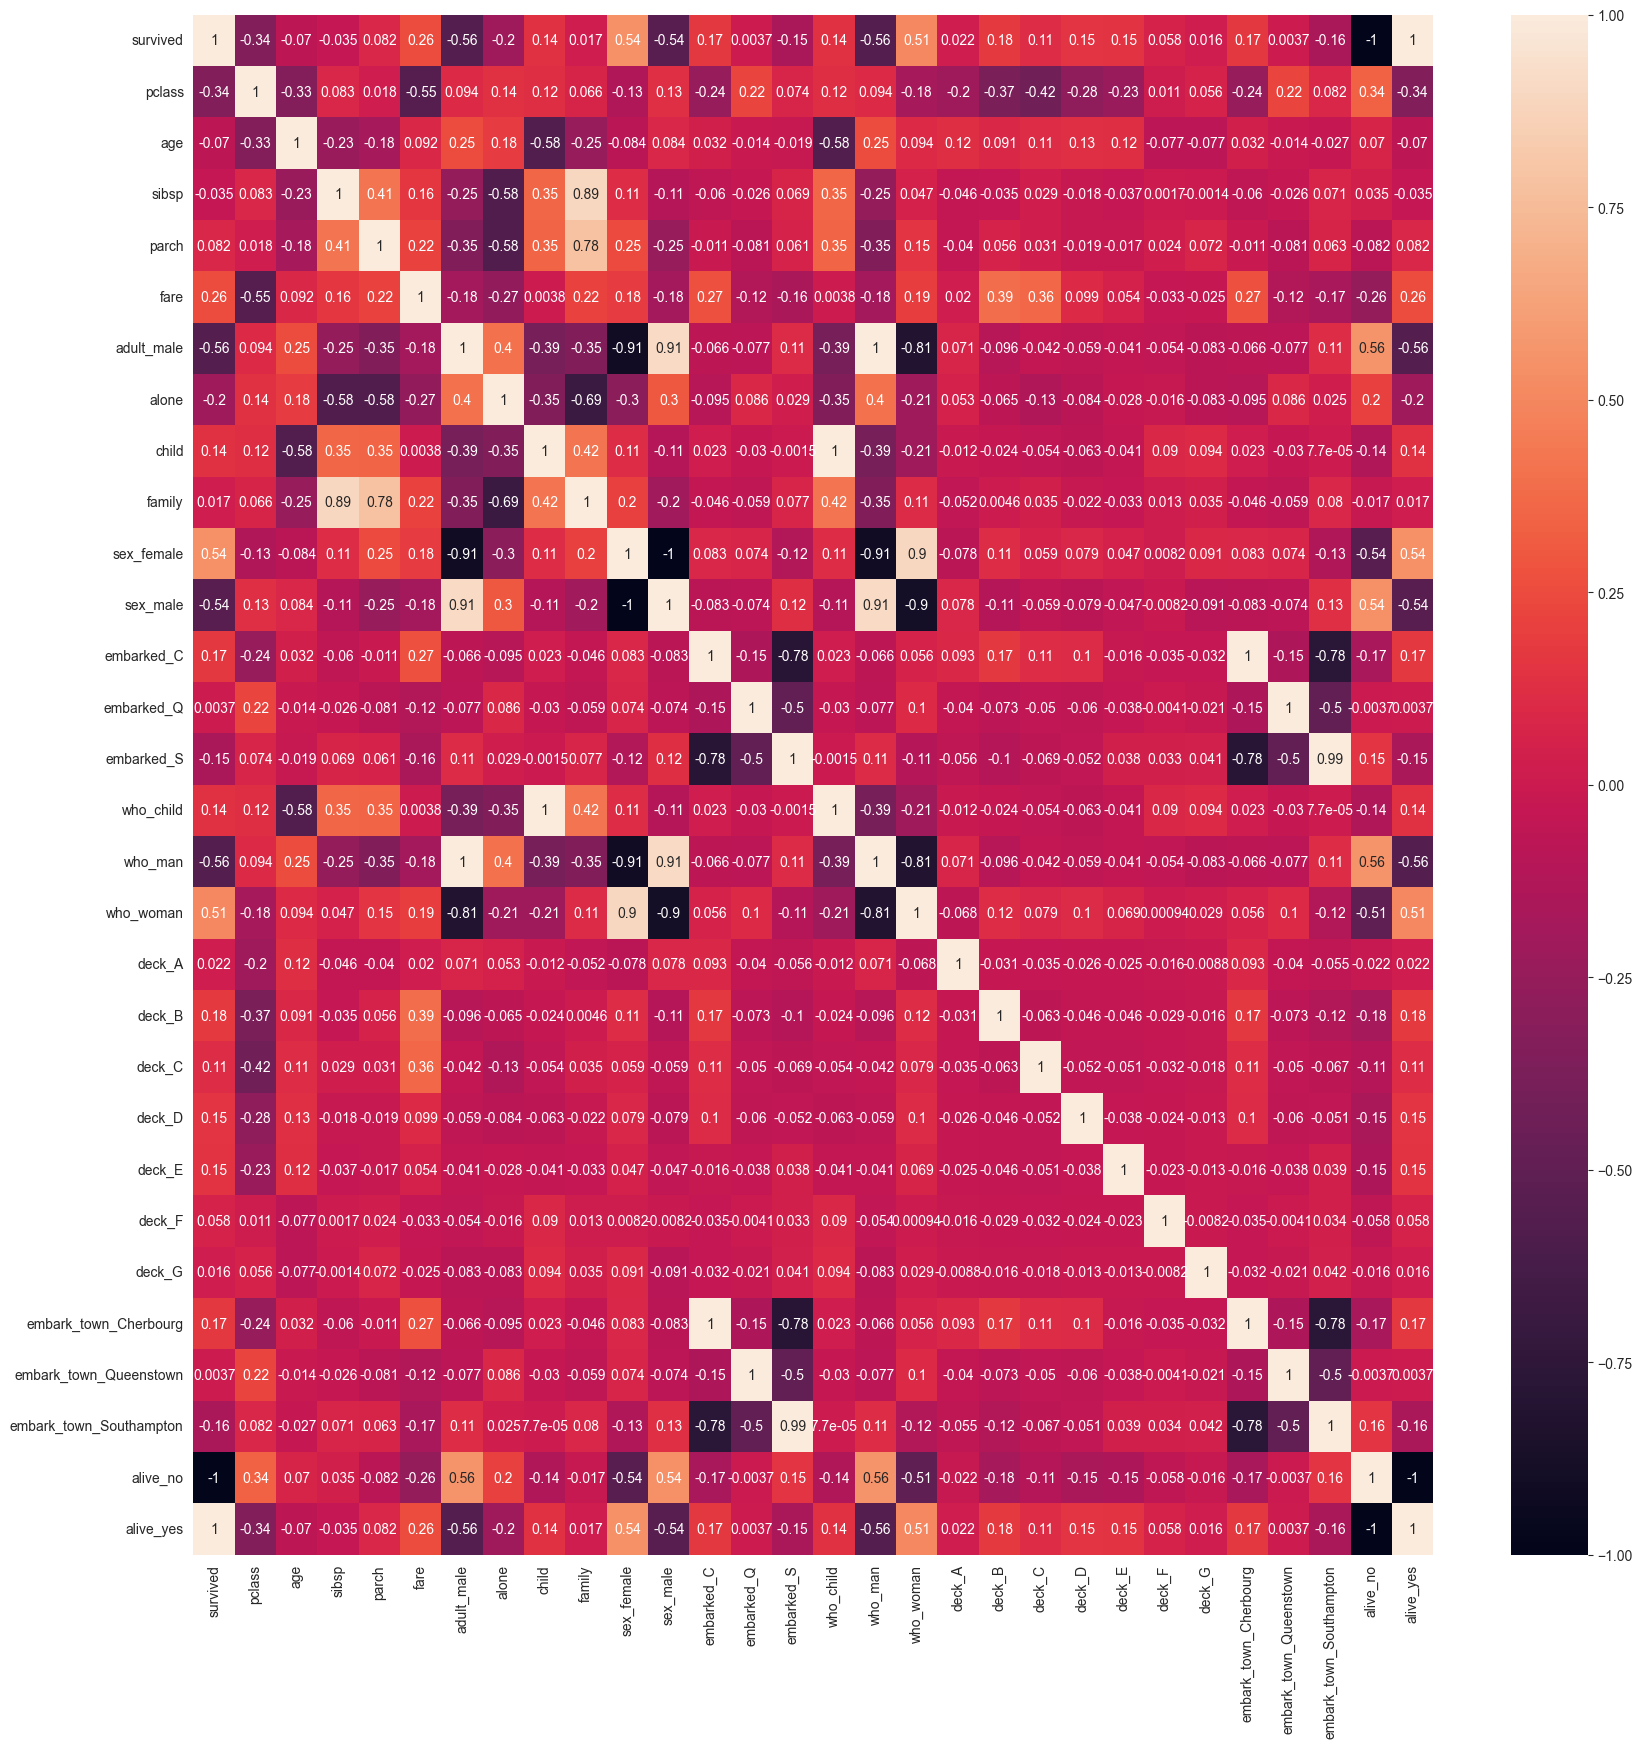

In [47]:
plt.figure(figsize=(20,20))
sns.heatmap(pd.get_dummies(df,drop_first=False).astype(float).corr(numeric_only=True),annot=True,vmin=-1)
plt.show()

`Observation` is that child is not heavily corelated with any column, but male ad feamle are so we will convert 
who column to a child column --> child Yes 1 / NO 0

In [32]:
pd.get_dummies(df, drop_first=True)

,survived,pclass,age,sibsp,parch,fare,adult_male,alone,sex_male,embarked_Q,...,who_woman,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,embark_town_Queenstown,embark_town_Southampton,alive_yes
0,0,3,22.0,1,0,7.2500,True,False,True,False,...,False,False,False,False,False,False,False,False,True,False
1,1,1,38.0,1,0,71.2833,False,False,False,False,...,True,False,True,False,False,False,False,False,False,True
2,1,3,26.0,0,0,7.9250,False,True,False,False,...,True,False,False,False,False,False,False,False,True,True
3,1,1,35.0,1,0,53.1000,False,False,False,False,...,True,False,True,False,False,False,False,False,True,True
4,0,3,35.0,0,0,8.0500,True,True,True,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,True,True,True,False,...,False,False,False,False,False,False,False,False,True,False
887,1,1,19.0,0,0,30.0000,False,True,False,False,...,True,True,False,False,False,False,False,False,True,True
888,0,3,NaN,1,2,23.4500,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
889,1,1,26.0,0,0,30.0000,True,True,True,False,...,False,False,True,False,False,False,False,False,False,True


In [ ]:
df.head()

Feature Eng

In [42]:
df["child"]=df.who.replace({'man':0, 'woman':0, 'child':1})

C:\Users\Ankur Goyal\AppData\Local\Temp\ipykernel_34636\829088406.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["child"]=df.who.replace({'man':0, 'woman':0, 'child':1})


In [ ]:
df.head(2)

We have two columns that talk about family 
We creat a Family Column=SibSP+Parch

In [43]:
df["family"]=df.sibsp+df.parch

In [ ]:
df.head(2)

In [ ]:
#pd.get_dummies(df.sex,dtype=int).head(10)

In [ ]:
#pd.get_dummies(df.sex,drop_first=True,dtype=int).head(10)

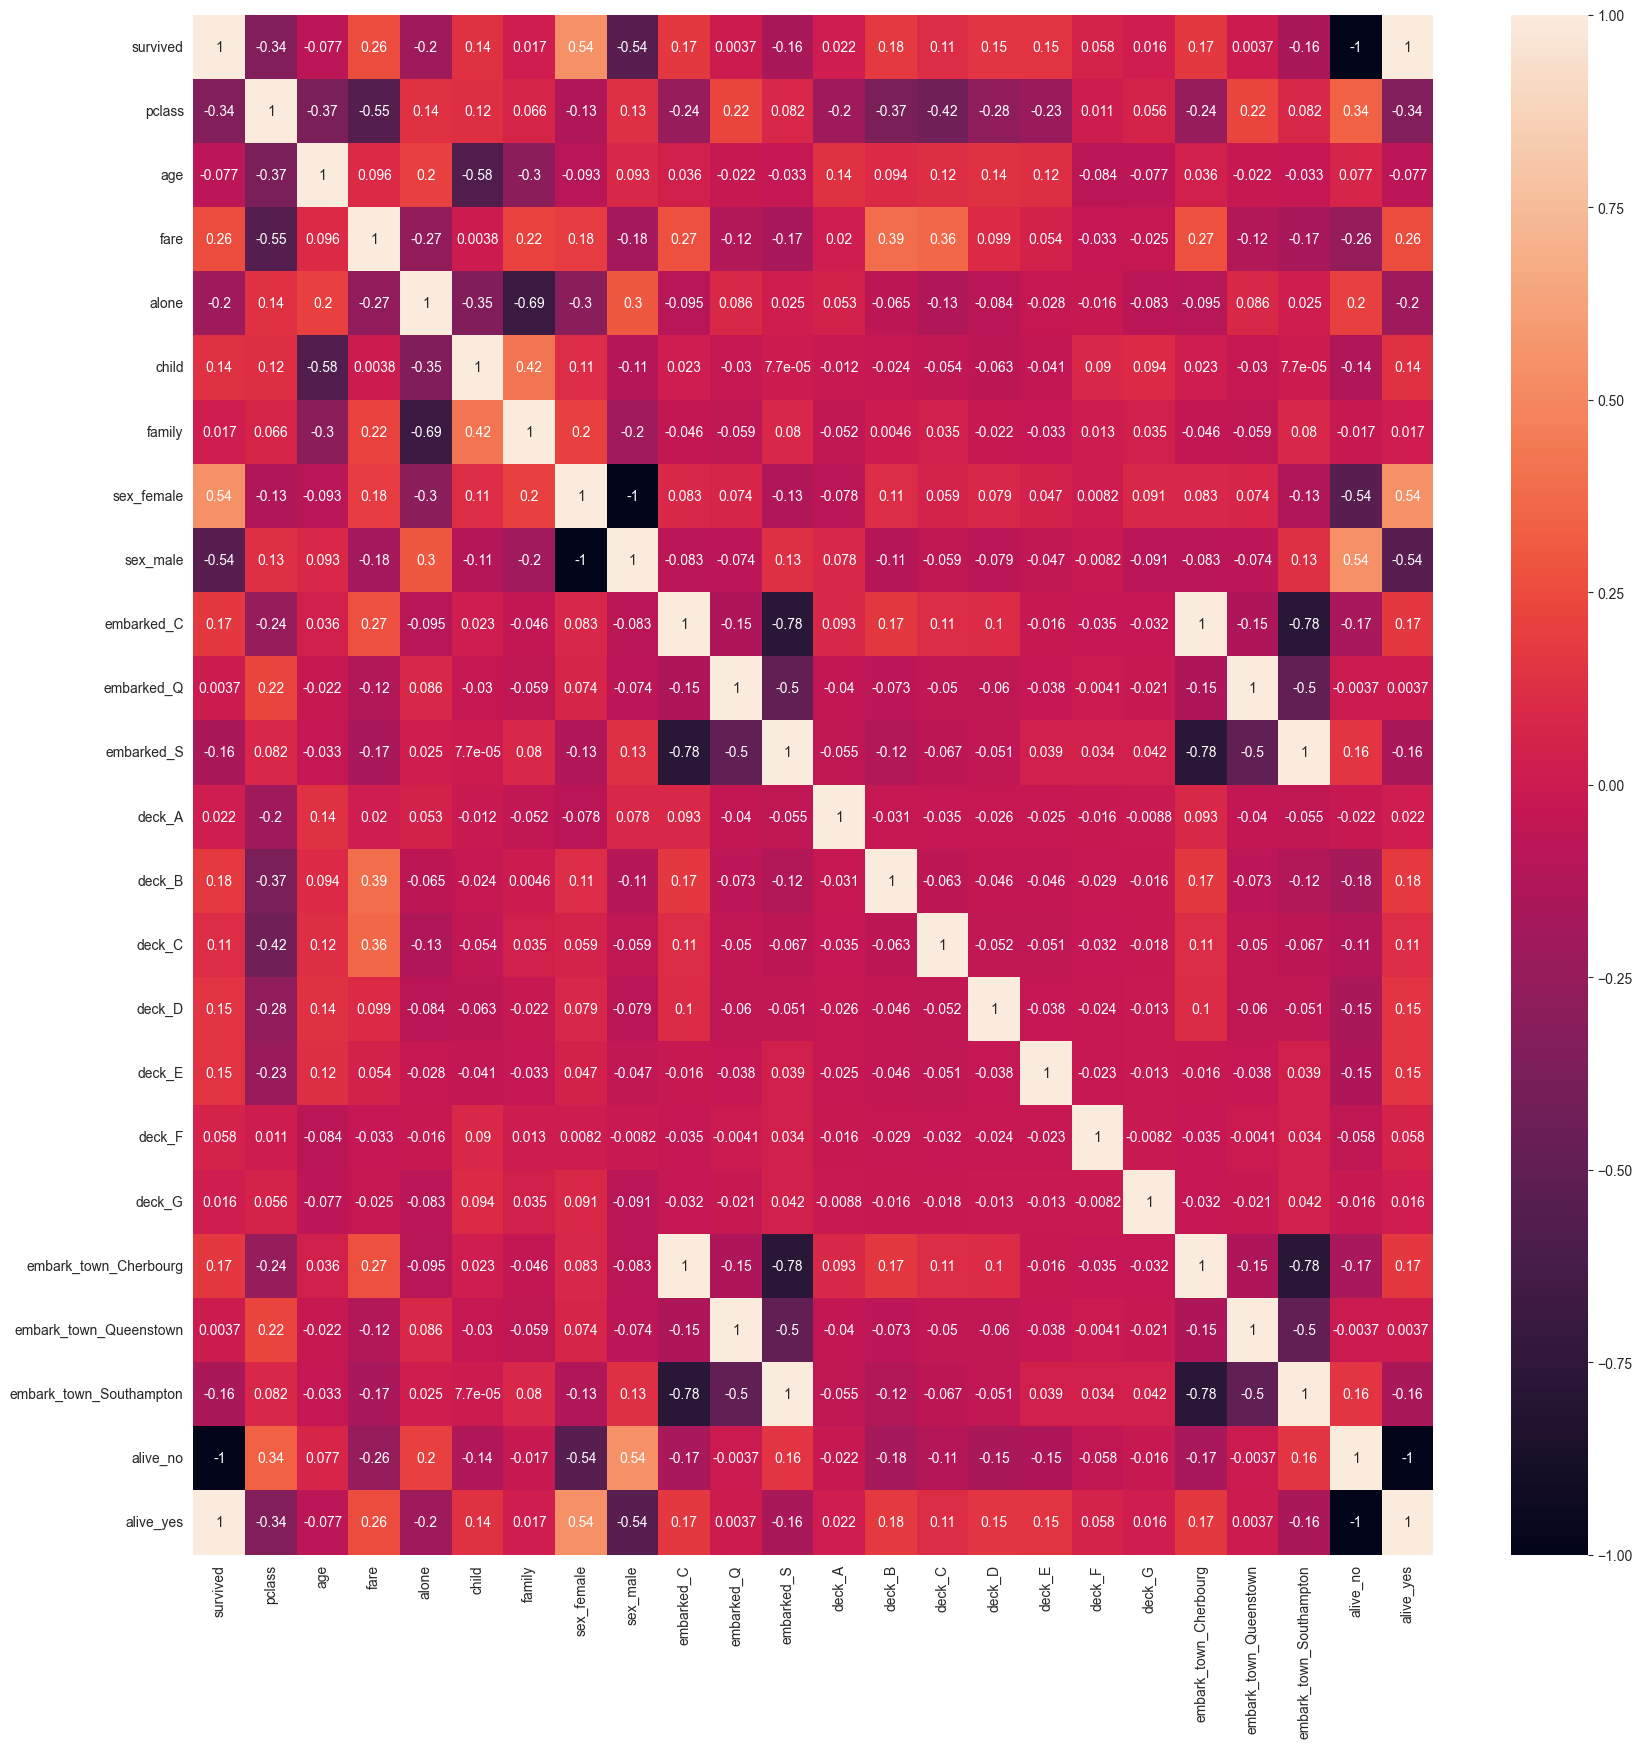

In [45]:
.plt.figure(figsize=(20,20))
sns.heatmap(pd.get_dummies(df.drop(columns=['who','adult_male','sibsp','parch'])).astype(float).corr(numeric_only=True),annot=True,vmin=-1)
plt.show()

In [11]:
df.drop(columns=['who','adult_male','sibsp','parch'],inplace=True)

In [ ]:
df.head()

In [ ]:
pd.get_dummies(df).head()

In [ ]:
pd.get_dummies(df,drop_first=True).astype(int).head(3) #DO NOT as age and fare is zero now

In [ ]:
pd.get_dummies(df,drop_first=True).astype(float).head(3)

In [ ]:
# dtype=float
pd.get_dummies(df,drop_first=True,dtype=float).head(3)

In [ ]:
pd.get_dummies(df,drop_first=True,dtype=int).head(3)

In [ ]:
df.head(3)

In [64]:
data=pd.get_dummies(df,drop_first=True).astype(float).copy()
data.head()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone,child,family,...,who_woman,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,embark_town_Queenstown,embark_town_Southampton,alive_yes
0,0.0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,0.0,3.0,35.0,0.0,0.0,8.0500,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


#### Train and test slpit

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
x,xt,y,yt =train_test_split(data.drop(columns="survived"),
                            data.survived,
                            test_size=.10,
                            random_state=42)

### Scaling data

In [60]:
from sklearn.preprocessing import MinMaxScaler

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
mms=MinMaxScaler()

In [ ]:
x[["fare","age"]].head()

In [ ]:
x[["fare","age"]].plot(kind="hist",subplots=True)

In [ ]:
mms.fit_transform(x[["fare","age"]])[:10]

In [ ]:
x[["fare","age"]]=mms.fit_transform(x[["fare","age"]]) 
xt[["fare","age"]]=mms.transform(xt[["fare","age"]]) 

In [ ]:
x.head()

In [ ]:
x[["fare","age"]].plot(kind="hist",subplots=True)

Machine Learning

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr=LogisticRegression()

In [ ]:
lr.fit(x,y)

In [ ]:
res=lr.predict(xt)
res

In [ ]:
lr.score(x,y)#training quality

In [ ]:
lr.score(xt,yt) # accuracy_score is used at the back

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(yt,res)

In [ ]:
accuracy_score(yt,res)*100

Other Metrics

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, roc_auc_score

In [ ]:
confusion_matrix(yt,res)

##### classification_report
- In classification problems in machine learning, a macro-average computes the average of metrics (like precision, recall, F1 score) for each class independently, and then the average of those values is taken.
- Macro Average: When you need to treat all classes equally, regardless of how frequent they are.
- 
Weighted Average: When the class distribution is imbalanced or when certain data points have more significance (e.g., weighted by the size of the sample or their importance)
- In classification problems, a weighted average computes the metrics for each class but adjusts each class’s result by its weight (often based on the frequency or support of the class)..

In [ ]:
print(classification_report(yt,res))

#### ROC AUC

##### Interpret the ROC AUC Plot

- False Positive Rate (FPR): The x-axis represents the rate of false positives (1 - specificity).
- True Positive Rate (TPR): The y-axis represents the rate of true positives (sensitivity).
- Diagonal Line: The dashed line represents a random classifier, where FPR equals TPR. If your curve is above this line, your model is performing better than random guessing.
- AUC (Area Under Curve): The AUC value quantifies the performance of the classifier. An AUC of 0.5 means the model performs no better than random guessing, while an AUC of 1.0 represents perfect classification.

#### Summary
- The ROC curve shows the trade-off between sensitivity (true positive rate) and the specificity (false positive rate) across different thresholds.
- AUC provides a single number summary of the performance of the model, with higher AUC indicating better performance.

In [ ]:
fpr, tpr, thresholds = roc_curve(yt,res)


In [ ]:
auc_score = roc_auc_score(yt,res)
print(f'AUC Score: {auc_score:.2f}')

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
